# Part II - Factors influencing borrowers' decisions in loan applications
## by Natalie Nguyen

## Investigation Overview


In this investigation, I wanted to look what purpose borrowers use loan for and some of the corresponding factors in these purpose such as: rate, APR, DTI, borrowers' profile.


## Dataset Overview

The dataset comprises 113,937 loans with 81 variables for each loan, including borrower income, loan amount, borrower rate (interest rate), current loan status, and several other variables. Some of the outliers and null values were removed from the analysis due to inconsistencies or missing information. After tidying, the new dataset comprises 96,074 loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# data wrangling and cleaning
duplicated_data = ['ListingKey', 'ListingNumber', 'ListingCreationDate']
df = df.drop_duplicates(subset=duplicated_data, keep='first')

credit_score = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
df = df.dropna(subset=credit_score)
df['CreditScoreMean'] = df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
df['ListingCategory'] = df['ListingCategory (numeric)'].map(category_titles)

df2 = df[['Term', 'BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment',
          'DebtToIncomeRatio', 'IncomeRange', 'EmploymentStatus', 'ListingCategory',
          'CreditScoreMean']]

In [4]:
df2.IncomeRange = df2.IncomeRange.str.replace('Not employed', '$0')
order_income = {'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                '$75,000-99,999', '$100,000+', 'Not displayed']}

for key, value in order_income.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df2[key] = df2[key].astype(correct_order)
    
df2 = df2.dropna(subset=['DebtToIncomeRatio'])

df2.loc[df2['IncomeRange'].notnull(), 'EmploymentStatus'] = df2.loc[df2['IncomeRange'].notnull(), 'EmploymentStatus'].fillna('Not available')
df2 = df2[~((df2['IncomeRange'] == '$0') | (df2['IncomeRange'] == 'Not displayed')) & df2['EmploymentStatus'].notnull()]

## Distribution of Borrower Loan Purpose

The majority of borrowers have applied for loans with the purpose of debt consolidation, indicating that many individuals are seeking financial assistance to pay off their existing debts.

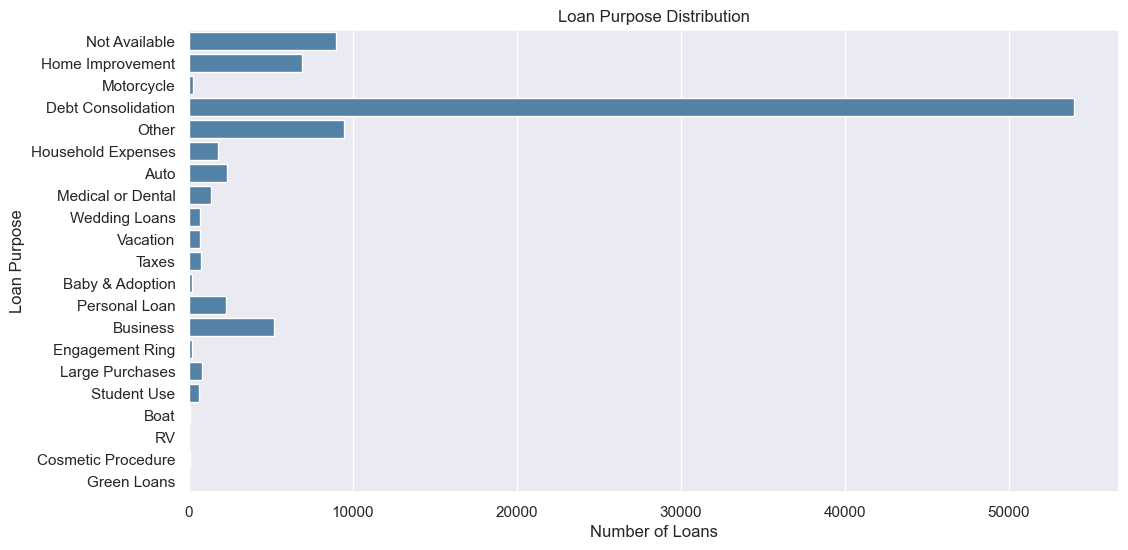

In [5]:
sb.set_theme(style='darkgrid')
plt.figure(figsize=[12,6])
sb.countplot(data = df2, y = 'ListingCategory', color='steelblue')
plt.title('Loan Purpose Distribution')
plt.xlabel('Number of Loans')
plt.ylabel('Loan Purpose')
plt.show()

## Loan Purpose vs Income Range

It can be observed that in most cases, borrowers seeking loans for various purposes fall within the income range of 25k-75k, particularly for the purpose of Debt Consolidation. This suggests that while borrowers do have some source of income, it may not be sufficient to meet their financial needs.

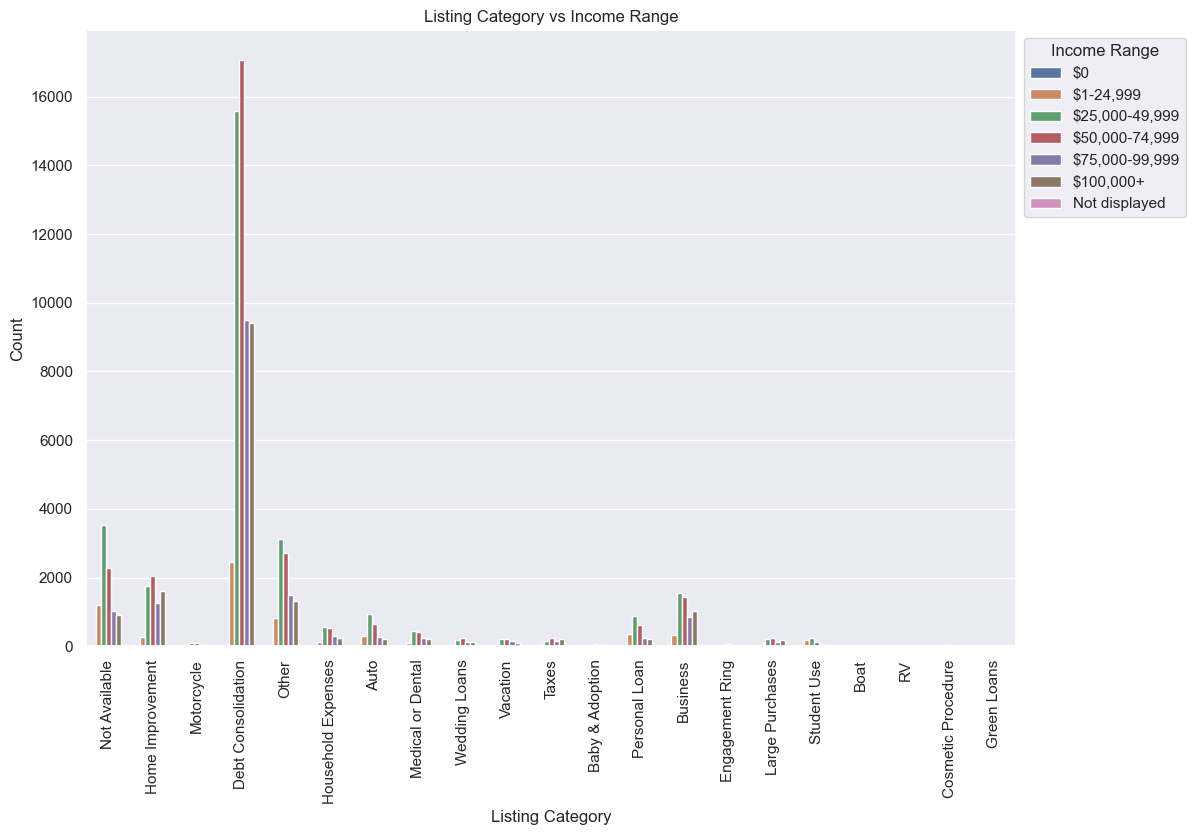

In [6]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df2, x='ListingCategory', hue='IncomeRange')
plt.xticks(rotation=90)
plt.legend(title='Income Range', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Listing Category vs Income Range')
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.show()

## Loan Purpose vs Credit Score

It appears that borrower's credit scores are consistent across different loan purposes. On average, credit scores range from 670 to 730 regardless of the loan purpose.

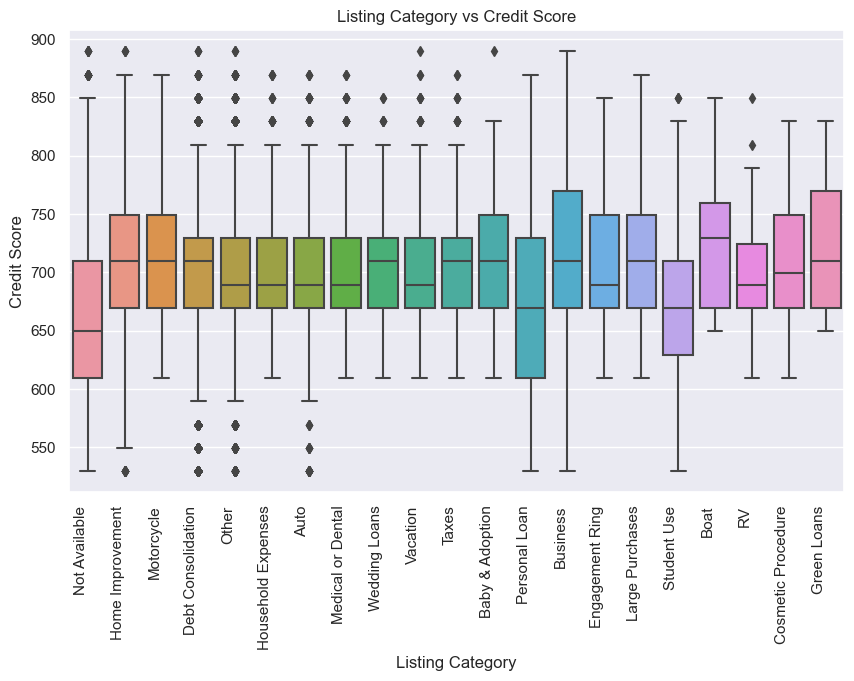

In [7]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df2, x='ListingCategory', y='CreditScoreMean')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Listing Category')
plt.ylabel('Credit Score')
plt.title('Listing Category vs Credit Score')
plt.show()

## Distribution of Debt-to-Income Ratio across Loan Purposes and Employment Status
It is apparent that borrowers with loan purposes such as debt consolidation, home improvement, household expense, medical, or dental generally have a lower debt-to-income ratio, with values lower than 0.5. Conversely, borrowers with loan purpose of baby and adoption tend to have higher DTI. Moreover, it is expected that those with part-time, retired, and not-employed employment status have higher DTI.

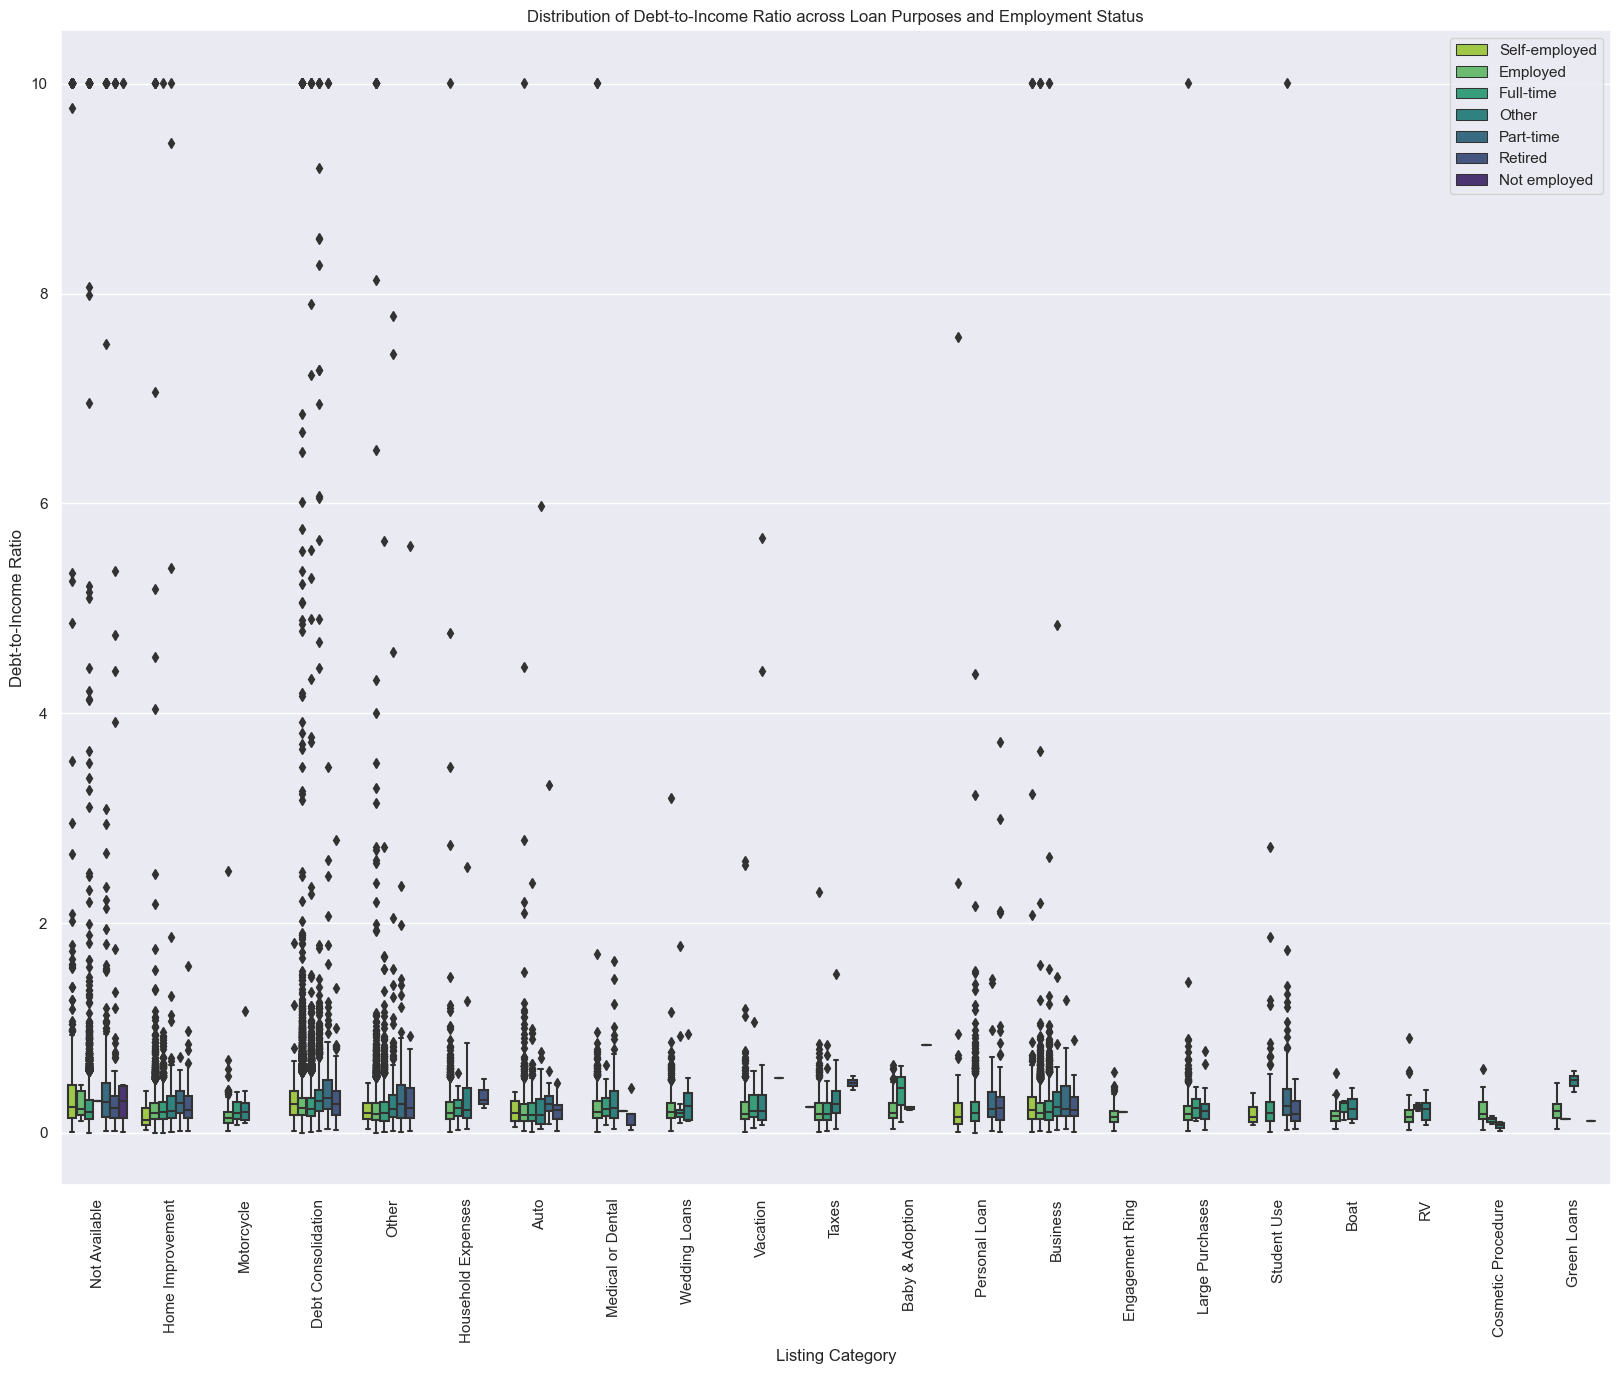

In [8]:
plt.figure(figsize=(20, 15))
sb.boxplot(data=df2, x='ListingCategory', y='DebtToIncomeRatio', hue='EmploymentStatus', palette='viridis_r')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Listing Category')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Distribution of Debt-to-Income Ratio across Loan Purposes and Employment Status')
plt.show()

In [9]:
!jupyter nbconvert Part_II_slide_deck_final.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_final.ipynb to slides
[NbConvertApp] Writing 854943 bytes to Part_II_slide_deck_final.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Natalie\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Natalie\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Natalie\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Natalie\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Natalie\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
 